#Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch.nn as nn
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import ConcatDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

#Model

In [ ]:
# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num=10):
        super(AlexNet, self).__init__()
        self.feature = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=2, stride=1),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=2, stride=2),
            nn.Conv2d(64, 96, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=2, stride=1),
            nn.Conv2d(96, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=2, stride=1),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=2, stride=1),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(32*9*9,2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(2048,1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024,num),

        )

    def forward(self, x):

        x = self.feature(x)
        x = x.view(-1,32*9*9)
        x = self.classifier(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load trained model checkpoint
model_checkpoint = torch.load("/content/drive/MyDrive/D.L/trained_model2.pth",map_location=device)

In [ ]:
# Create the model
model = AlexNet()
model.load_state_dict(model_checkpoint)
model.eval()  # Set the model to evaluation mode

AlexNet(
  (feature): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(96, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequent

#DataSet

In [ ]:
# Define the transformations
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

In [ ]:
#Download train dataset from mnist dataset
dataset  = torchvision.datasets.MNIST(root='./data',train=True,transform=transform,download=True)

num_samples_per_class = 122

total_samples = num_samples_per_class * 10

class_indices = dataset.targets.unique()
datasets_per_class = []
for class_index in class_indices:
    #Collect data for a specific class
    class_samples = [i for i, label in enumerate(dataset.targets) if label == class_index]
    #Extracting a specified number of data of a specified class
    selected_samples = class_samples[:num_samples_per_class]
    #Creat new dataset for specified class
    selected_dataset = torch.utils.data.Subset(dataset, selected_samples)
    datasets_per_class.append(selected_dataset)

dataset = ConcatDataset(datasets_per_class)

# dataset = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 139240132.77it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 40581471.97it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 52055152.51it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7520935.16it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Get the data and labels from the test set:
train_images = torch.stack([dataset[i][0] for i in range(len(dataset))])
train_labels = torch.tensor([dataset[i][1] for i in range(len(dataset))])

print(train_labels.shape)

torch.Size([1220])


In [ ]:
#reshape labels
train_labels = train_labels.view(-1, 1)
print(train_labels.shape)

torch.Size([1220, 1])


In [ ]:
# Define dataset transformations and load the MNIST dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

num_samples_per_class2 = 100

total_samples2 = num_samples_per_class2 * 10

class_indices2 = testset.targets.unique()
datasets_per_class2 = []
for class_index in class_indices2:
    class_samples2 = [i for i, label in enumerate(testset.targets) if label == class_index]
    selected_samples2 = class_samples2[:num_samples_per_class2]
    selected_dataset2 = torch.utils.data.Subset(testset, selected_samples2)
    datasets_per_class2.append(selected_dataset2)

testset = ConcatDataset(datasets_per_class2)

In [ ]:
# Get the data and labels from the test set:
test_images = torch.stack([testset[i][0] for i in range(len(testset))])
test_labels = torch.tensor([testset[i][1] for i in range(len(testset))])

#reshape labels
test_labels = test_labels.view(-1, 1)

#Calculate SI

In [ ]:
def get_outputs_features(layer_num,Images):


    def hook(module, input, output):
      global features
      features = output


    hook_handle = model.feature[layer_num].register_forward_hook(hook)

    with torch.no_grad():
        output = model(Images)

    hook_handle.remove()

    return(features)

In [ ]:
def get_outputs_classifier(layer_num,Images):



    def hook(module, input, output2):
      global features2
      features2 = output2


    hook_handle2 = model.classifier[layer_num].register_forward_hook(hook)

    with torch.no_grad():
        output2 = model(Images)

    hook_handle2.remove()

    return(features2)

In [ ]:
def si_cal(inputs,outputs,num):
  results = []

  for i, (input, label) in enumerate(zip(inputs, outputs)):
      distances = torch.sum((inputs - input) ** 2, dim=1)
      distances[i] = float('inf')
      nearest_index = torch.argmin(distances)
      nearest_label = outputs[nearest_index]
      if torch.equal(label, nearest_label):
          results.append(1)
      else:
          results.append(0)

  si = sum(results)/num

  return si

##SI for Train Data set

In [ ]:
feature_layers_si = []
for i in tqdm(range(0,15)):
  # print(i)
  layer_outputs = get_outputs_features(i,train_images)
  layer_outputs = layer_outputs.view(layer_outputs.size(0),-1)
  si = si_cal(layer_outputs,train_labels,1220)
  feature_layers_si.append(si)


for j in tqdm(range(0,7)):
  # print(i)
  layer_outputs2 = get_outputs_classifier(j,train_images)
  layer_outputs2 = layer_outputs2.view(layer_outputs2.size(0),-1)
  si2 = si_cal(layer_outputs2,train_labels,1220)
  feature_layers_si.append(si2)



100%|██████████| 7/7 [00:45<00:00,  6.44s/it]


In [ ]:
layers_name = ["f_conv1","f_RELU1","f_Maxpol1","f_conv2","f_RELU2","f_Maxpol2","f_conv3","f_RELU3","f_Maxpol3","f_conv4","f_RELU4","f_Maxpol4","f_conv5","f_RELU5","f_Maxpol5","c_Dropout1","c_Linear1","c_RELU1","c_Dropout2","c_Linear2","c_RELU2","c_Linear3"]

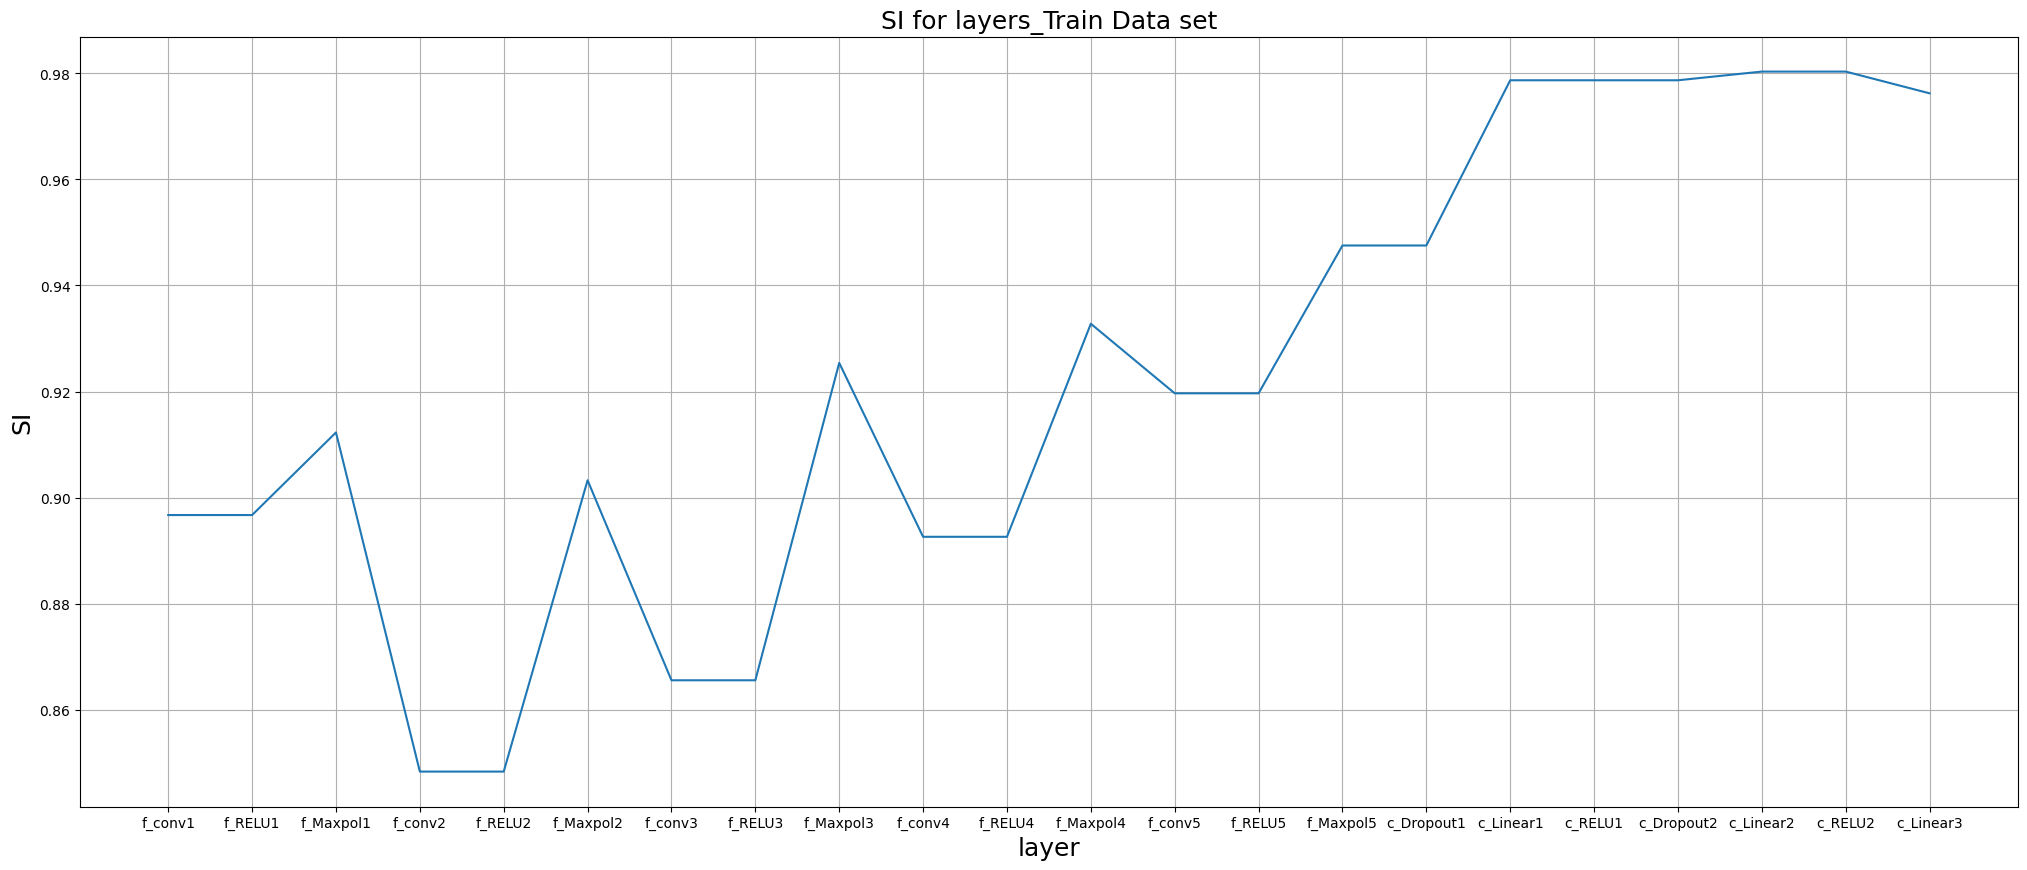

In [ ]:
plt.figure(figsize=(25, 10))
plt.plot(layers_name, feature_layers_si)

plt.xlabel('layer', fontsize=18)
plt.ylabel('SI', fontsize=18)
plt.title('SI for layers_Train Data set', fontsize=18)
plt.grid(True)

plt.show()

##SI for Test Data Set

In [ ]:
feature_layers_si2 = []
for i in tqdm(range(0,15)):

  layer_outputs2 = get_outputs_features(i,test_images)
  layer_outputs2 = layer_outputs2.view(layer_outputs2.size(0),-1)
  si2 = si_cal(layer_outputs2,test_labels,1000)
  feature_layers_si2.append(si2)


for j in tqdm(range(0,7)):

  layer_outputs2 = get_outputs_classifier(j,test_images)
  layer_outputs2 = layer_outputs2.view(layer_outputs2.size(0),-1)
  si2 = si_cal(layer_outputs2,test_labels,1000)
  feature_layers_si2.append(si2)



100%|██████████| 7/7 [00:29<00:00,  4.21s/it]


In [ ]:
layers_name = ["f_conv1","f_RELU1","f_Maxpol1","f_conv2","f_RELU2","f_Maxpol2","f_conv3","f_RELU3","f_Maxpol3","f_conv4","f_RELU4","f_Maxpol4","f_conv5","f_RELU5","f_Maxpol5","c_Dropout1","c_Linear1","c_RELU1","c_Dropout2","c_Linear2","c_RELU2","c_Linear3"]

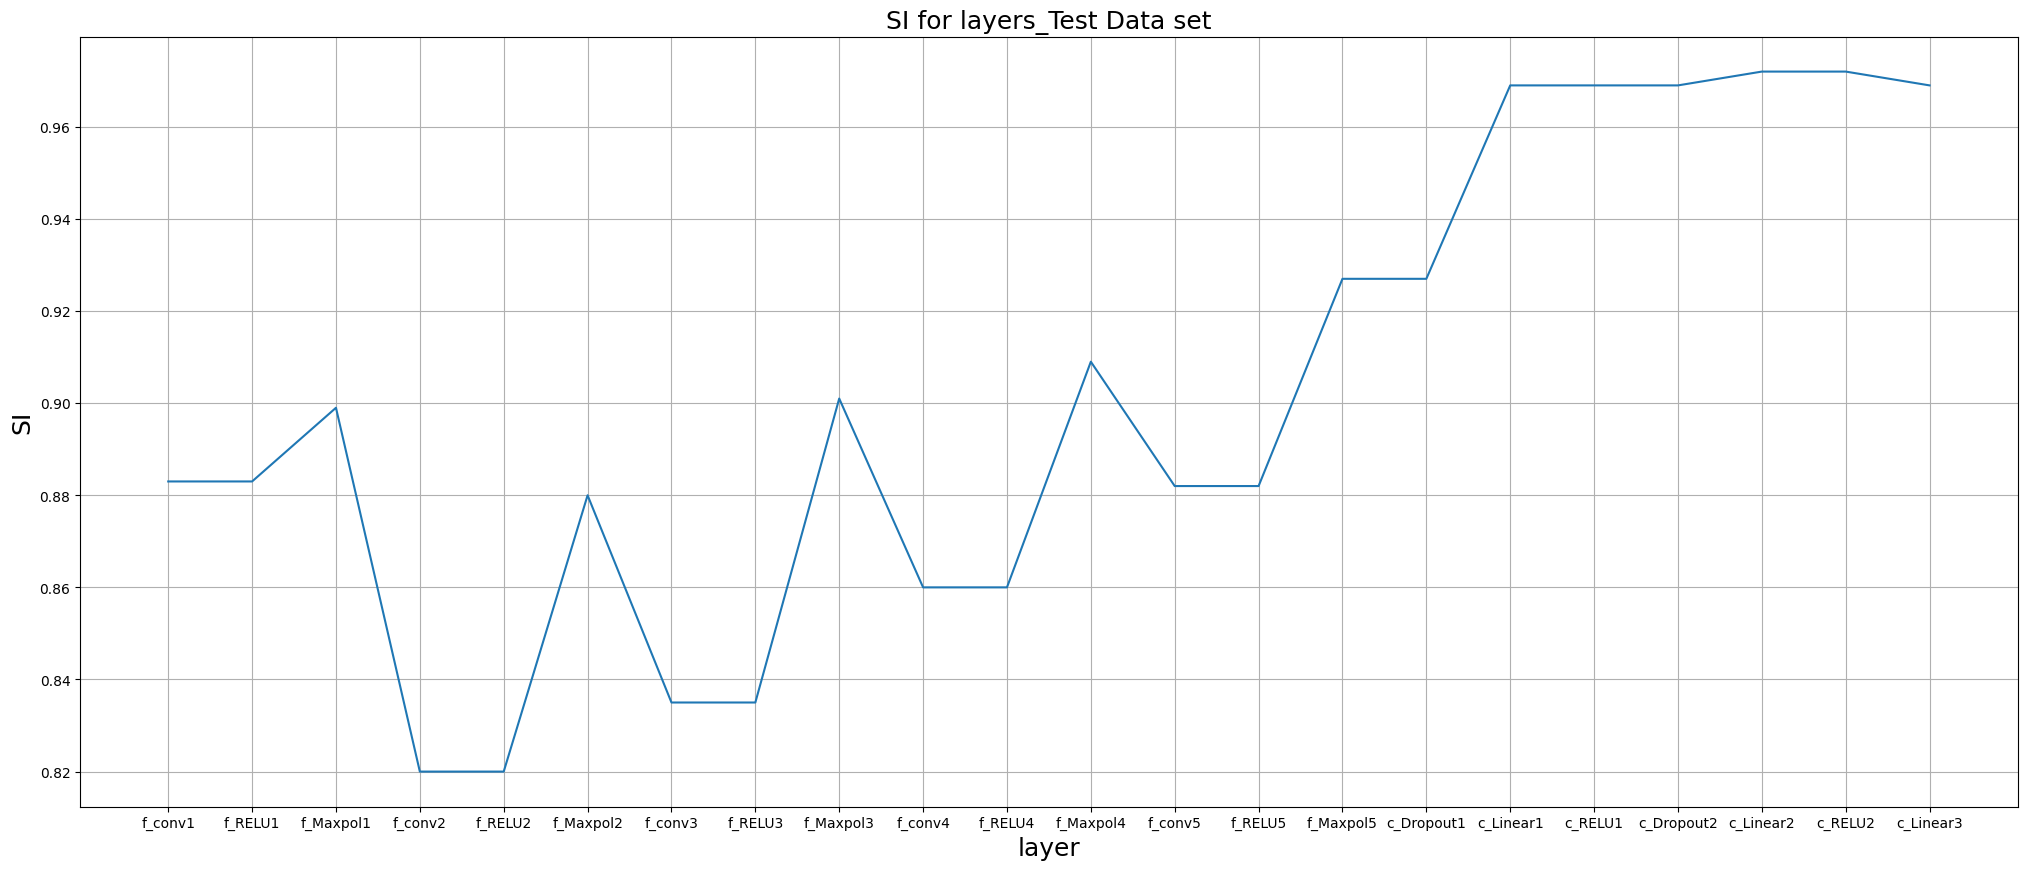

In [ ]:
plt.figure(figsize=(25, 10))
plt.plot(layers_name, feature_layers_si2)


plt.xlabel('layer', fontsize=18)
plt.ylabel('SI', fontsize=18)
plt.title('SI for layers_Test Data set', fontsize=18)
plt.grid(True)

plt.show()